In [ ]:
# prompt: import housing prices dataset from kaggle

import pandas as pd

# Replace 'your_kaggle_username' and 'your_kaggle_key' with your actual credentials
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"nashwin","key":"51a9cd633e9f35a94bf2fc7c3c19eb18"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques -p /content/

# Unzip the dataset
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/

# Load the data into a pandas DataFrame
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

# Now you can work with the dataframes df_train and df_test
print(df_train.head())
print(df_test.head())

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 9.09MB/s]
Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/data_description.txt  
  inflating: /content/sample_submission.csv  
  inflating: /content/test.csv       
  inflating: /content/train.csv      
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2       

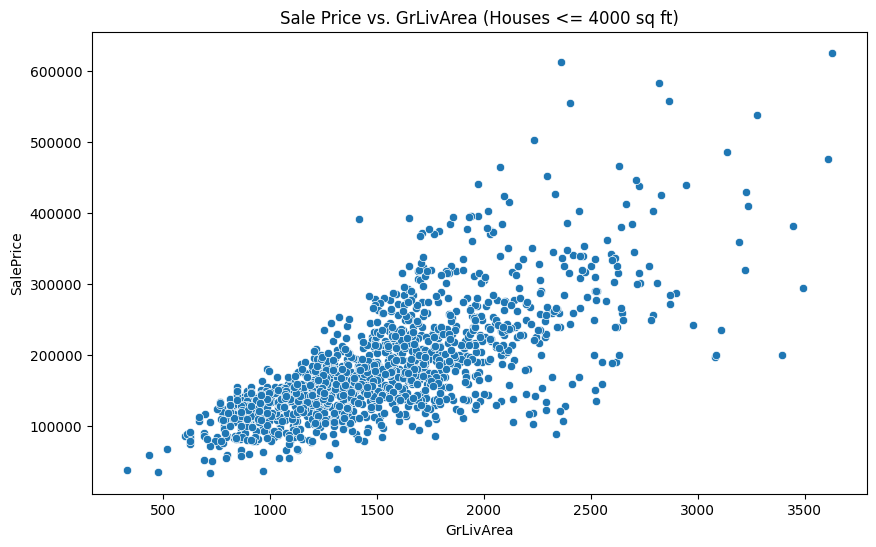

In [ ]:
# prompt: visualize sales price to grlivarea and remove house more than 4000 sft

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train is already loaded as in the previous code

# Filter out houses with GrLivArea > 4000
df_filtered = df_train[df_train['GrLivArea'] <= 4000]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_filtered)
plt.title('Sale Price vs. GrLivArea (Houses <= 4000 sq ft)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

Correlation between MSZoning and SalePrice: -0.16687220265320646
Correlation between Street and SalePrice: 0.04103553550004948
Correlation between Alley and SalePrice: -0.09260744997351615
Correlation between LotShape and SalePrice: -0.25557987048712216
Correlation between LandContour and SalePrice: 0.015453241660960342
Correlation between Utilities and SalePrice: -0.014314296147248806
Correlation between LotConfig and SalePrice: -0.06739602315941741
Correlation between LandSlope and SalePrice: 0.05115224817946654
Correlation between Neighborhood and SalePrice: 0.21085146582230319
Correlation between Condition1 and SalePrice: 0.09115491154092832
Correlation between Condition2 and SalePrice: 0.007512734036333064
Correlation between BldgType and SalePrice: -0.08559060818352927
Correlation between HouseStyle and SalePrice: 0.18016262334399102
Correlation between RoofStyle and SalePrice: 0.22240529240713833
Correlation between RoofMatl and SalePrice: 0.1323831119277881
Correlation between 

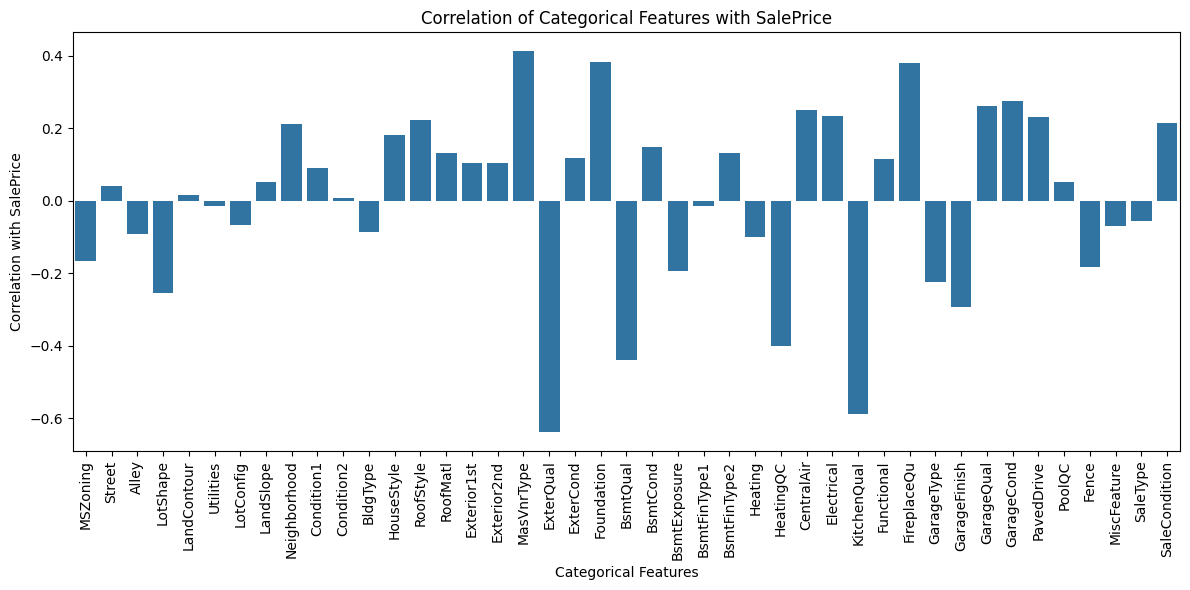

In [ ]:
# prompt: find correlation of all categories to sales price

# Assuming df_train is already loaded as in the previous code

# Calculate the correlation between all categorical features and SalePrice
categorical_cols = df_train.select_dtypes(include=['object']).columns
correlations = {}

for col in categorical_cols:
    # Convert categorical features to numerical using Label Encoding (or one-hot encoding if needed)
    df_temp = df_train.copy()  # Create a copy to avoid modifying the original DataFrame
    df_temp[col] = df_temp[col].astype('category').cat.codes

    correlation = df_temp[col].corr(df_temp['SalePrice'])
    correlations[col] = correlation

# Print the correlations
for col, corr in correlations.items():
    print(f"Correlation between {col} and SalePrice: {corr}")

# Optionally, create a bar plot of the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=list(correlations.keys()), y=list(correlations.values()))
plt.xticks(rotation=90)
plt.xlabel('Categorical Features')
plt.ylabel('Correlation with SalePrice')
plt.title('Correlation of Categorical Features with SalePrice')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()




Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64


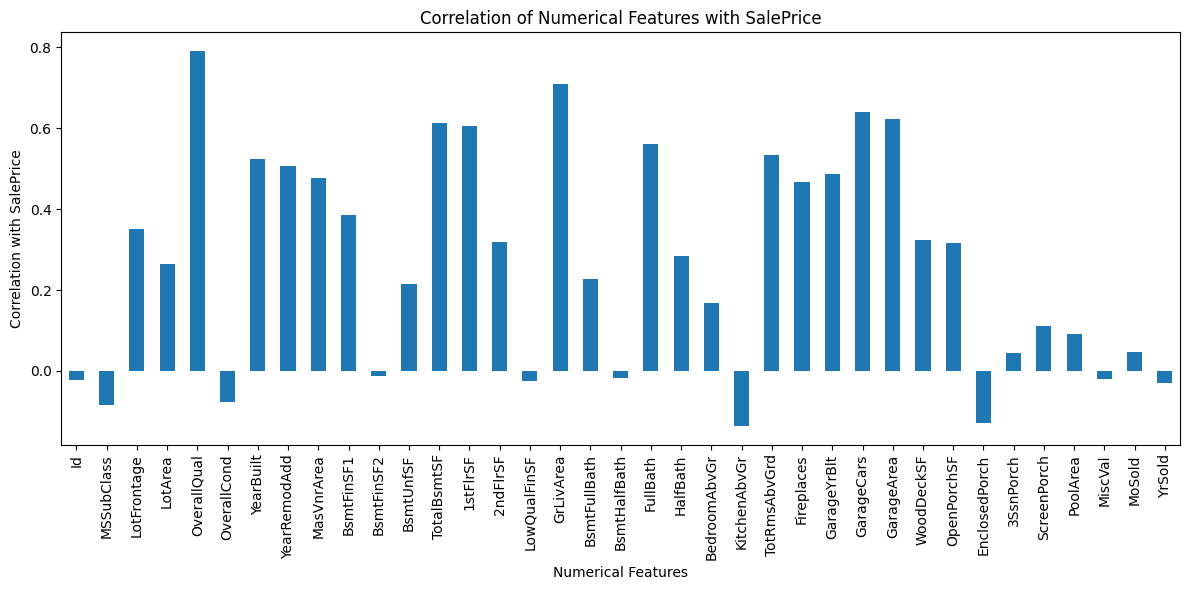

In [ ]:
# prompt: find correlation of all columns to sales price

# Assuming df_train is already loaded as in the previous code

# Calculate the correlation between all numerical features and SalePrice
numerical_cols = df_train.select_dtypes(include=['number']).columns
correlations = df_train[numerical_cols].corr()['SalePrice']

# Remove the correlation with SalePrice itself
correlations = correlations.drop('SalePrice')

# Print the correlations
print(correlations)

# Optionally, create a bar plot of the correlations
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation with SalePrice')
plt.title('Correlation of Numerical Features with SalePrice')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
for col, corr in correlations.items():
     print(f"Correlation between {col} and SalePrice: {corr}") if corr > 0.4 else None

Correlation between MasVnrType and SalePrice: 0.4117979089413356


In [ ]:
# prompt: create a training set containing columns where the correlation is greater than 0, print the shape

# Create a training set containing columns where the correlation is greater than 0
correlation_matrix = df_train.corr(numeric_only=True)
correlation_with_saleprice = correlation_matrix['SalePrice']
features_with_positive_correlation = correlation_with_saleprice[correlation_with_saleprice > 0.1].index.tolist()
training_set = df_train[features_with_positive_correlation]

# Print the shape of the training set
print("Shape of training set:", training_set.shape)


Shape of training set: (1460, 25)


In [ ]:
# prompt: to training_set merge the saleprice column from df_train

# Assuming df_train and training_set are already defined as in the previous code

# Merge 'SalePrice' column from df_train to training_set
training_set = pd.merge(training_set, df_train[['SalePrice']], left_index=True, right_index=True)

# Print the shape and head of the updated training set
print(training_set.shape)
print(training_set.head())

(1460, 26)
   LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7       2003          2003       196.0   
1         80.0     9600            6       1976          1976         0.0   
2         68.0    11250            7       2001          2002       162.0   
3         60.0     9550            7       1915          1970         0.0   
4         84.0    14260            8       2000          2000       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  TotRmsAbvGrd  \
0         706        150          856       856  ...             8   
1         978        284         1262      1262  ...             6   
2         486        434          920       920  ...             6   
3         216        540          756       961  ...             7   
4         655        490         1145      1145  ...             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       2003.0

In [ ]:
# prompt: use training_set, replace any non numerical data or missing data with a 0, and train a pytorch ANN with 5 fully connected layers to predict SalePrice, generate a plot of normalized entropy over the epochs

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming training_set is already defined and loaded as in the previous code

# Replace non-numerical data and missing values with 0
training_set = training_set.fillna(0)
for col in training_set.columns:
    if training_set[col].dtype == 'object':
        training_set[col] = training_set[col].astype('category').cat.codes

# Separate features (X) and target variable (y)
X = training_set.drop('SalePrice', axis=1).values
y = training_set['SalePrice'].values

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)  # No activation on the output layer for regression
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = ANN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 700
entropy_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate and store entropy (example calculation - replace with your specific entropy calculation)
    with torch.no_grad():
        probabilities = torch.softmax(outputs, dim=1) # Assuming classification task
        entropy = -torch.sum(probabilities * torch.log(probabilities + 1e-8), dim=1).mean()
        entropy_values.append(entropy.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot normalized entropy
plt.plot(entropy_values)
plt.xlabel('Epochs')
plt.ylabel('Normalized Entropy')
plt.title('Normalized Entropy over Epochs')
plt.show()


KeyError: "['SalePrice'] not found in axis"

In [ ]:
# prompt: use the model to predict on test set, print mse and rmse

with torch.no_grad():
    y_pred = model(X_test)
    mse = criterion(y_pred, y_test)
    rmse = torch.sqrt(mse)
    print(f'Test MSE: {mse.item():.4f}')
    print(f'Test RMSE: {rmse.item():.4f}')



Test MSE: 0.1995
Test RMSE: 0.4466


In [ ]:
# prompt: can you calculate the score, the formula is log(10*features used/79)*(test set rmse loss)

features_used = len(training_set.columns) - 1  # Subtract 1 for the 'SalePrice' column
test_set_rmse_loss = rmse.item()  # Assuming rmse is calculated in the previous code

score = np.log10((10 * features_used) / 79) * test_set_rmse_loss

print(f"Score: {score}")

Score: 0.21553053350624807
